<a href="https://colab.research.google.com/github/IAMJASURBEK/AIapplicationSystem/blob/main/week9/week9_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I did Configuration 6 so the order of configuration are in descending order from 6 to 1

### Week 9 Lab 2 - 1

 We standardize
both the training and test data by using the mean and standard deviation
from the training data . The parameter axis=0 ensures
that we compute the mean and standard deviation for each input variable
separately. The resulting mean (and standard deviation) is a vector of
means instead of a single value. That is, the standardized value of the
nitric oxides concentration is not affected by the values of the per capita
crime rate or any of the other variables.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# Read and standardize the data.
boston_housing = keras.datasets.boston_housing
(raw_x_train, y_train), (raw_x_test,
y_test) = boston_housing.load_data()
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train =(raw_x_train - x_mean) / x_stddev
x_test =(raw_x_test - x_mean) / x_stddev


57026/57026 [==============================] - 0s 0us/step


### Week 9 Lab 2 - 2

</br>
Dropout is an effective regularization technique for neural
networks. 
</br>

Dropout forces units to be able to work with a random set of other units.
Doing so prevents subsets of units from co-adapting to solve specific cases
and has been shown to reduce overfitting. The below operation shows how to
add dropout to a model in Keras.


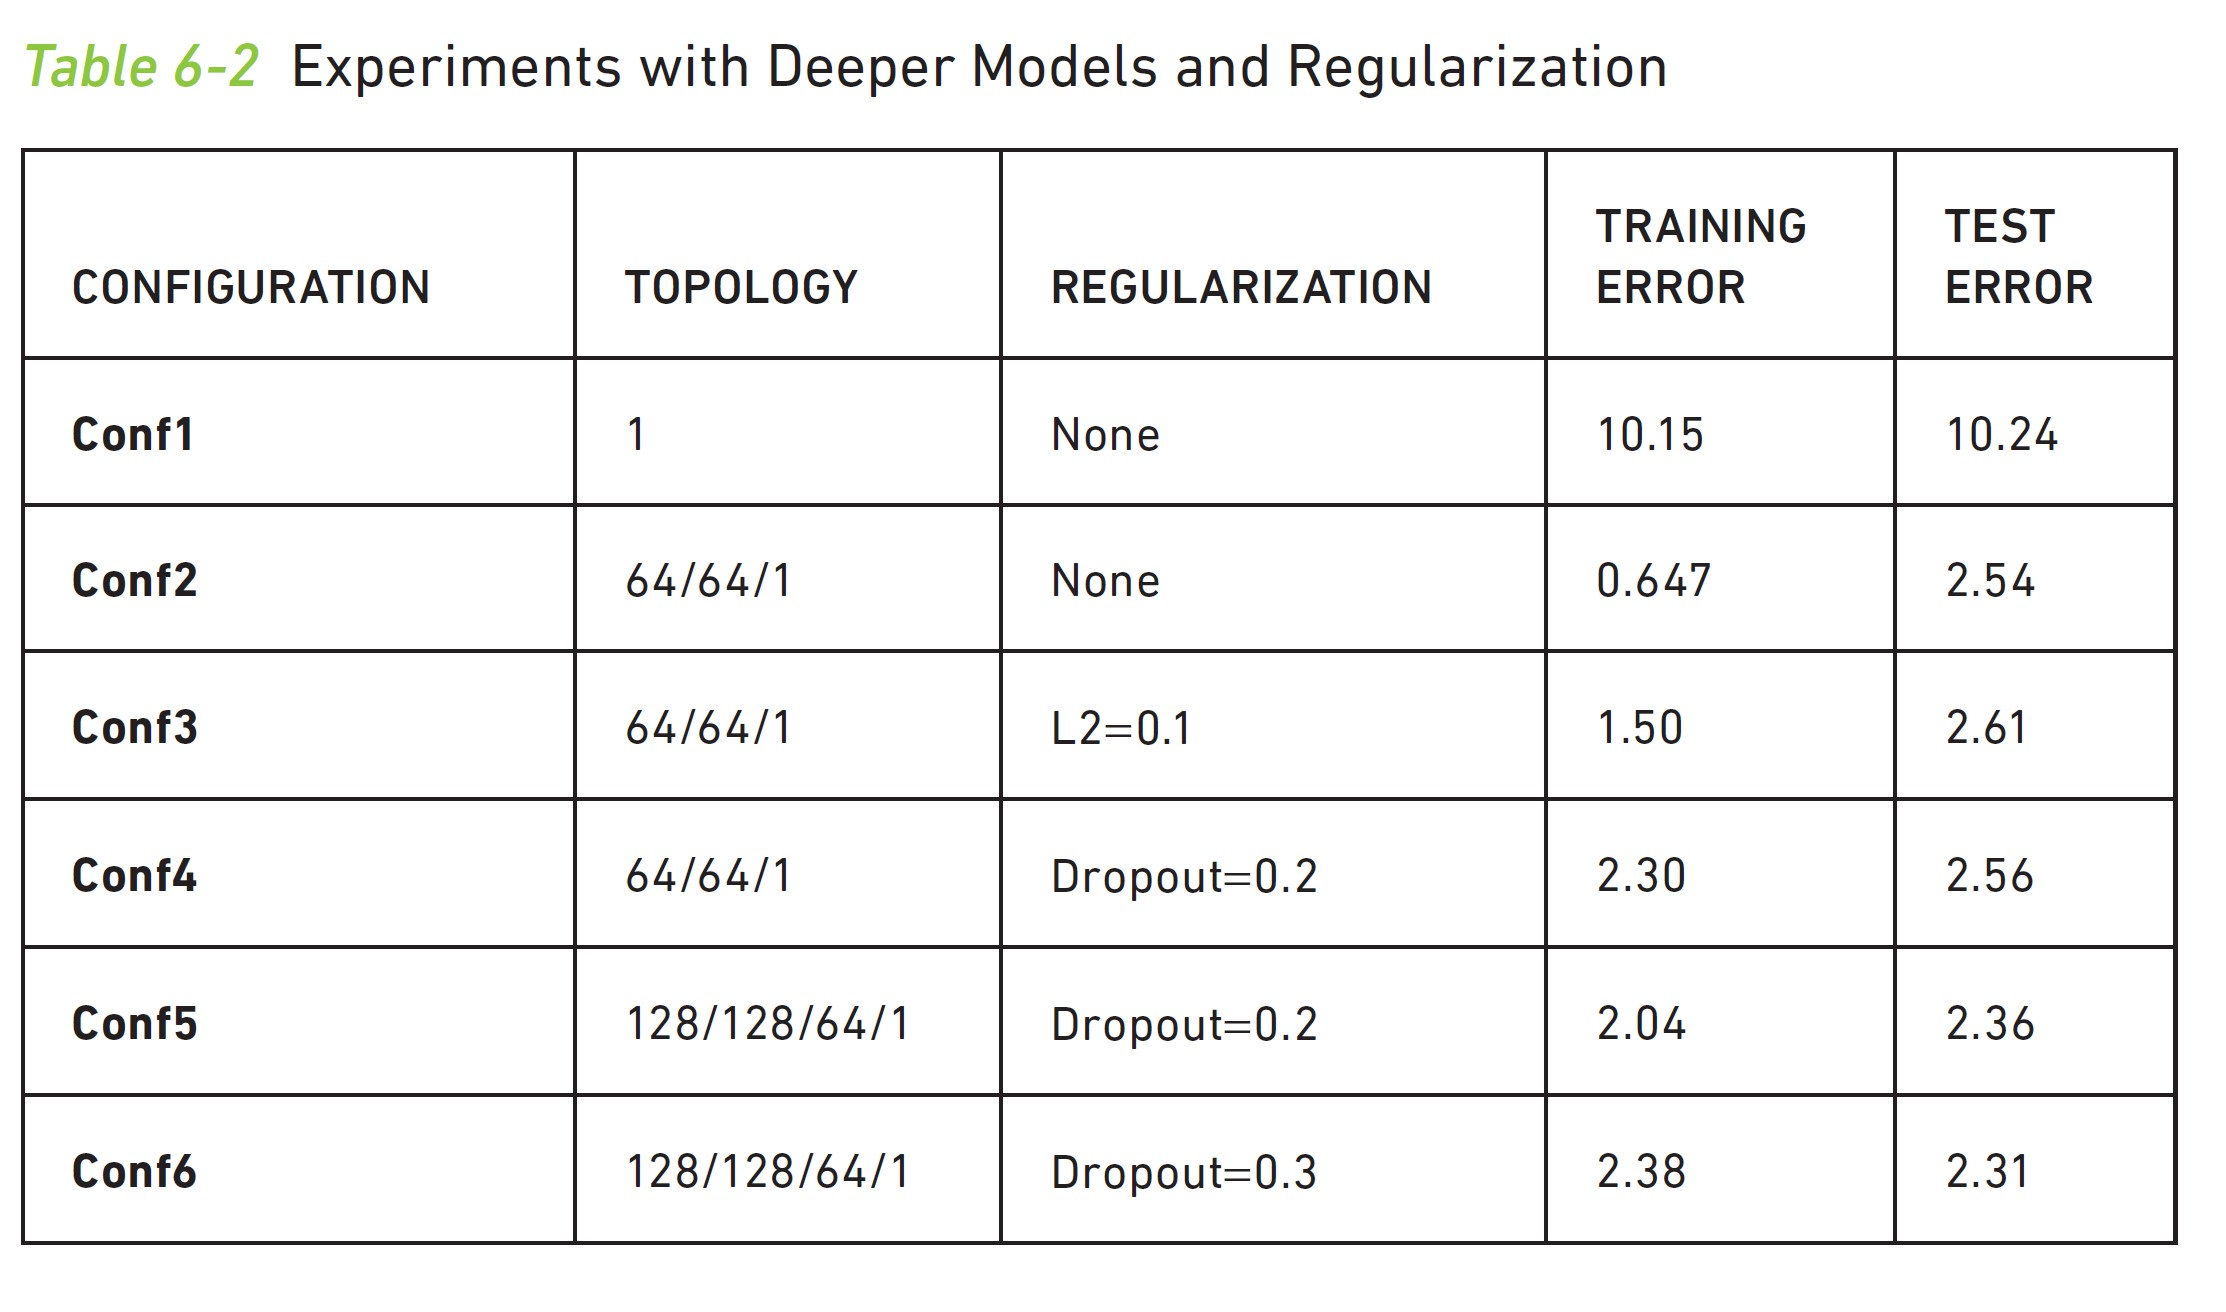

## Configuration 6

In [11]:
# Create and train model.

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=[13]))

model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense (64, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

history6 = model.fit(x_train, y_train, validation_data=( x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Print first 4 predictions.

predictions = model.predict(x_test)

for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1792      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                

### Week 9 changed operation Conf5 Regularization : Dropout=0.2

In [10]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=[13]))

model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense (64, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

history5 = model.fit(x_train, y_train, validation_data=( x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Print first 4 predictions.

predictions = model.predict(x_test)

for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1792      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                

### Week 9 changed operation Conf4 Topology : 64/64/1 Regularization : Dropout=0.2

In [9]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=[13]))

model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

history4 = model.fit(x_train, y_train, validation_data=( x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Print first 4 predictions.

predictions = model.predict(x_test)

for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 544.8199 - mean_absol

### Week 9 changed operation Conf3 Topology : 64/64/1 L2 = 0.1

In [8]:
model = Sequential()
from tensorflow.keras.regularizers import l2

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.2),input_shape=[13]))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.2)))
model.add(Dense(1, activation='linear',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.2)))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

history3 = model.fit(x_train, y_train, validation_data=( x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Print first 4 predictions.

predictions = model.predict(x_test)

for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                896       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 1s - loss: 548.4936 - mean_absolute_error: 21.3970 - val_loss: 515.5126 - val_mean_absolute_error: 20.6892 - 522ms/epoch - 20ms/step
Epoch 2/500
26/26 - 0s - loss: 420.3486 - mean_absolute_error: 18.2793 - val_loss: 343.2177 - val_mean_absolute_error: 16.2163 - 47ms/epoch - 2ms/step
Epoch 3/500


## Configuration 2

In [4]:
# Create and train model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = [13]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history2 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 522.9293 - mean_absolute_error: 20.9501 - val_loss: 478.0501 - val_mean_absolute_error: 19.9419 - 412ms/epoch - 16ms/step
Epoch 2/500
26/26 - 0s - loss: 373.7173 - mean_absolute_error: 17.1255 - val_loss: 280.9814 - val_mean_absolute_error: 14.6333 - 57ms/epoch - 2ms/step
Epoch 3/500


## Configuration 1 

In [5]:
# Create and train model
model = Sequential()
model.add(Dense(1, activation = 'linear', input_shape = [13]))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history1 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 590.3329 - mean_absolute_error: 22.3832 - val_loss: 617.1165 - val_mean_absolute_error: 23.0396 - 314ms/epoch - 12ms/step
Epoch 2/500
26/26 - 0s - loss: 587.3563 - mean_absolute_error: 22.3552 - val_loss: 613.7827 - val_mean_absolute_error: 23.0048 - 53ms/epoch - 2ms/step
Epoch 3/500
26/26 - 0s - loss: 584.4100 - mean_absolute_error: 22.3281 - val_loss: 610.5348 - val_mean_absolute_error: 22.9699 - 52ms/epoch - 2ms/step
Epoch 4/500
26/26 - 0s - loss: 581.7800 - mean_absolute_error: 22.3080 - val_loss: 607.3021 - val_mean_absolute_error: 22.9345 - 42

## Graphs

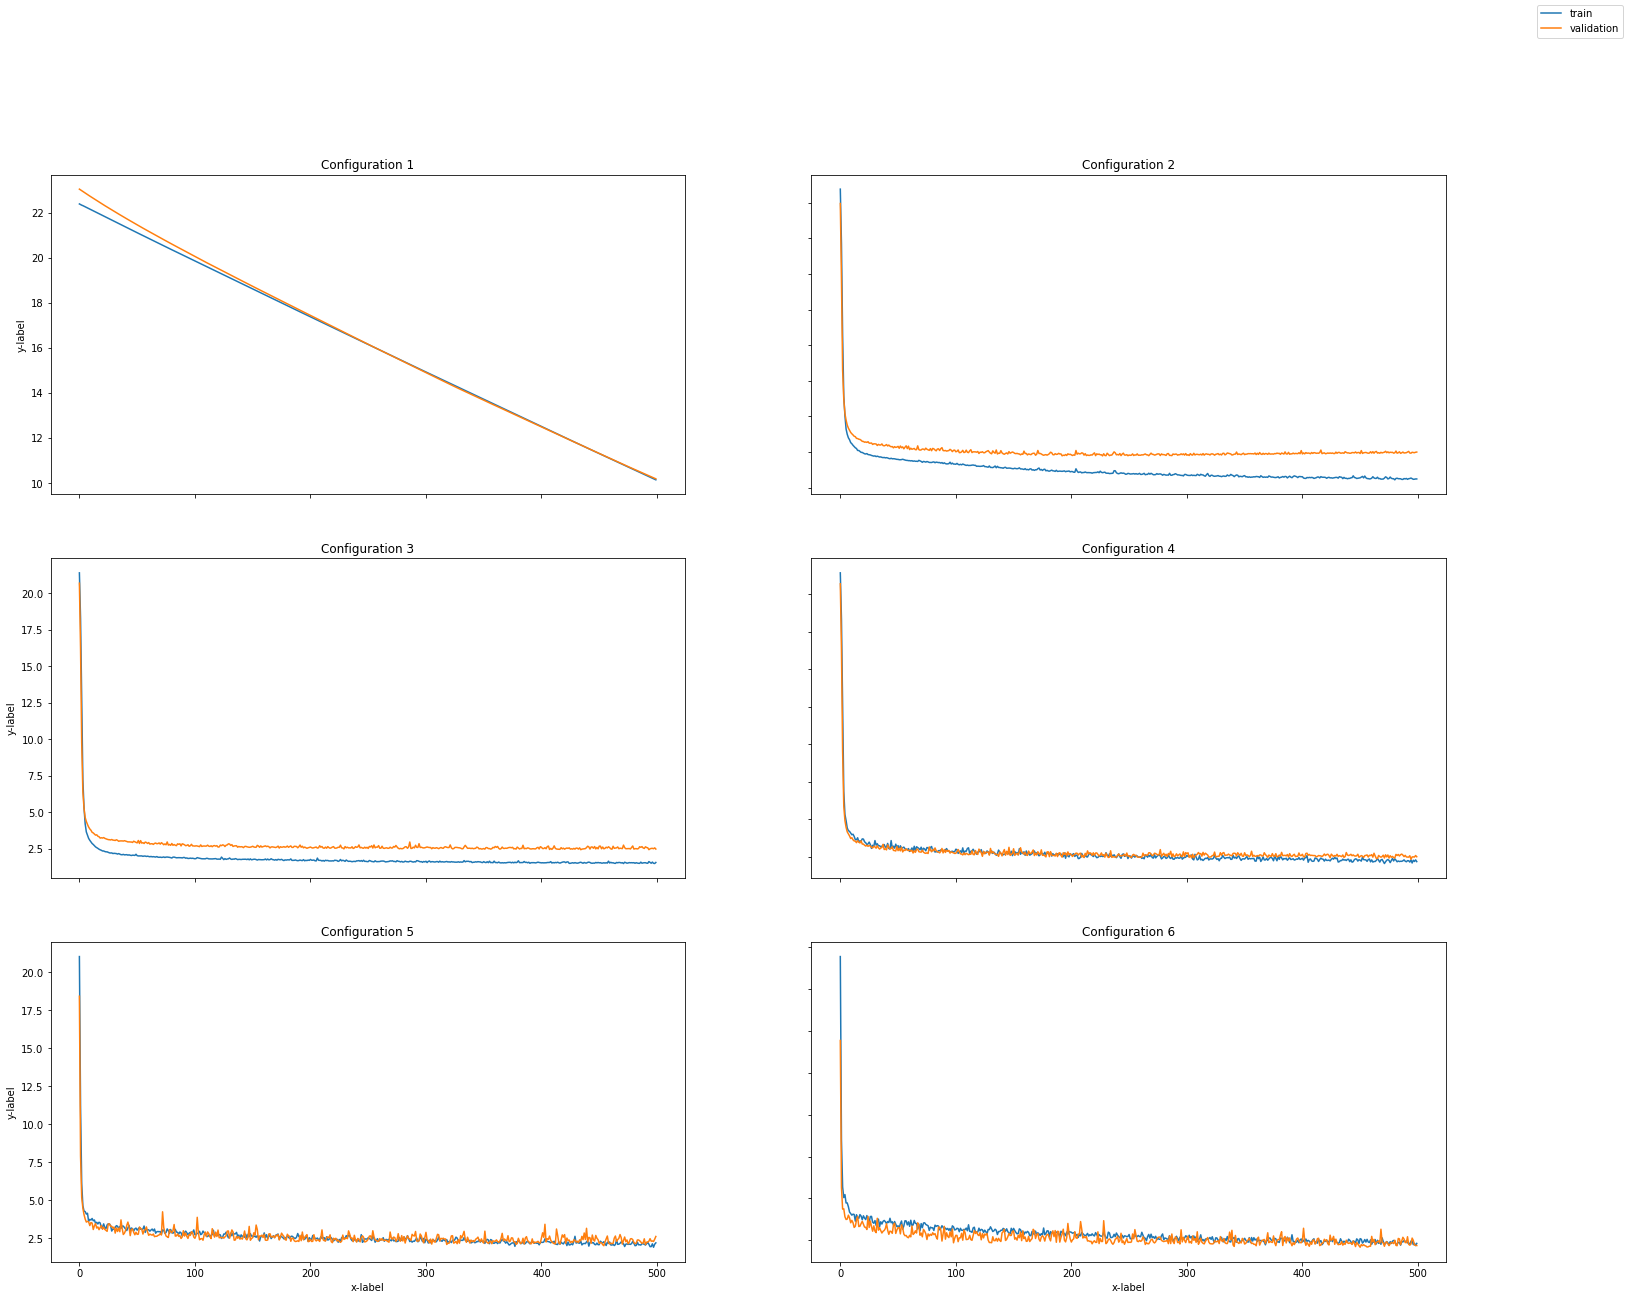

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2)

axes[0, 0].plot(history1.history["mean_absolute_error"])
axes[0, 0].plot(history1.history["val_mean_absolute_error"])
axes[0, 0].set_title('Configuration 1')

axes[0, 1].plot(history2.history["mean_absolute_error"])
axes[0, 1].plot(history2.history["val_mean_absolute_error"])
axes[0, 1].set_title('Configuration 2')

axes[1, 0].plot(history3.history["mean_absolute_error"])
axes[1, 0].plot(history3.history["val_mean_absolute_error"])
axes[1, 0].set_title('Configuration 3')

axes[1, 1].plot(history4.history["mean_absolute_error"])
axes[1, 1].plot(history4.history["val_mean_absolute_error"])
axes[1, 1].set_title('Configuration 4')

axes[2, 0].plot(history5.history["mean_absolute_error"])
axes[2, 0].plot(history5.history["val_mean_absolute_error"])
axes[2, 0].set_title('Configuration 5')

axes[2, 1].plot(history6.history["mean_absolute_error"])
axes[2, 1].plot(history6.history["val_mean_absolute_error"])
axes[2, 1].set_title('Configuration 6')




fig.legend(["train", "validation"], loc="upper right")
fig.set_figheight(20)
fig.set_figwidth(25)

for ax in axes.flat:
  ax.set(xlabel='x-label', ylabel='y-label')

for ax in axes.flat:
  ax.label_outer()